In [1]:
from statistics import mean
import seaborn as sns
import networkx as nx
import pandas as pd
import time
import datetime
import freeman as fm
import operator

Carregamento das bases de dados

In [2]:
data = pd.read_csv('bill/hotStuff.csv')

In [3]:
data2 = pd.read_excel('bill/hot100.xlsx')

Função para checar se a string está na tabela ascii

In [4]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

Filtro aplicado no songid

In [5]:
def filtro(musica):
    new = musica.replace("#","")
    new = new.replace('"',"")
    new = new.replace("'","")
    new=new.replace("(","")
    new=new.replace(")","")
    new=new.replace("[","")
    new=new.replace("]","")
    new=new.replace("ç","c")
    new=new.replace("é","e")
    new=new.replace("ñ","n")
    new=new.replace("ò","o")
    new=new.replace("¿","?")
    new=new.replace("ó","o")
    new=new.replace("á","a")
    new=new.replace("ö","o")
    new=new.replace("Ó","O")
    new=new.replace("à","a")
    new=new.replace("�","?")
    
    
    return new
def musica_filtrada (row):
   return filtro(row['SongID'])

In [6]:
data2['SongFiltred']=data2.apply (lambda row: musica_filtrada(row), axis=1)

In [23]:
data2.head()

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,SongFiltred
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),0.0,270740.0,91.0,...,-4.803,0.0,0.0735,0.01700,0.000016,0.1790,0.623,80.002,4.0,"AdictoTainy, Anuel AA & Ozuna"
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,The Ones That Didnt Make It Back HomeJustin Moore
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,0.0,215733.0,88.0,...,-6.362,1.0,0.0308,0.37100,0.000000,0.2310,0.323,95.799,4.0,ShallowLady Gaga & Bradley Cooper
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,1.0,196760.0,86.0,...,-4.169,1.0,0.2100,0.05880,0.000000,0.0955,0.667,76.388,4.0,EnemiesPost Malone Featuring DaBaby
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,1.0,228185.0,61.0,...,-5.725,0.0,0.1680,0.00124,0.000001,0.0716,0.856,135.979,4.0,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo"


Dicionário dos SongIDs e as respectivas semanas na Bilboard

In [8]:
dic_SongID_Weeks={}

for i in data.index:
    if data["SongID"][i] in dic_SongID_Weeks:
        if data["Weeks on Chart"][i]>dic_SongID_Weeks[data["SongID"][i]]:
            dic_SongID_Weeks[data["SongID"][i]]=data["Weeks on Chart"][i]
    else:
        dic_SongID_Weeks[data["SongID"][i]]=data["Weeks on Chart"][i]
print(dic_SongID_Weeks)

{'Poor Little FoolRicky Nelson': 11, 'One Sweet DayMariah Carey & Boyz II Men': 27, 'Candle In The Wind 1997/Something About The Way You Look TonightElton John': 42, 'Do I Make You ProudTaylor Hicks': 8, '3Britney Spears': 20, 'Born This WayLady Gaga': 20, 'Part Of MeKaty Perry': 22, 'Shake It OffTaylor Swift': 50, 'PillowtalkZayn': 24, "Can't Stop The Feeling!Justin Timberlake": 52, 'Shape Of YouEd Sheeran': 58, 'Thank U, NextAriana Grande': 28, '7 RingsAriana Grande': 33, 'SuckerJonas Brothers': 38, 'PatriciaPerez Prado And His Orchestra': 14, 'Always Be My BabyMariah Carey': 32, 'Tha CrossroadsBone Thugs-N-Harmony': 20, '4 Seasons Of LonelinessBoyz II Men': 20, 'CrushDavid Archuleta': 23, 'Party In The U.S.A.Miley Cyrus': 28, 'California GurlsKaty Perry Featuring Snoop Dogg': 27, 'BoyfriendJustin Bieber': 20, 'Best Song EverOne Direction': 21, 'SorryJustin Bieber': 42, 'Cold WaterMajor Lazer Featuring Justin Bieber & MO': 27, 'RockstarPost Malone Featuring 21 Savage': 40, 'PsychoPos

Filtro aplicado no nome das músicas

In [9]:
import re

dic_bugs={
    "Lil Nas &":"Lil Nas X",
    "& Ambassadors":"X Ambassadors",
    "Mia &":"Mia X",
    "for KING & COUNTRY":"for KING and COUNTRY",
    "Brooks & Dunn":"Brooks and Dunn"   
}

feat="Featuring"
def parse(nomes):
    
    new_nomes=nomes.replace("(","")
    new_nomes=new_nomes.replace(")","")
    new_nomes=new_nomes.replace("[","")
    new_nomes=new_nomes.replace("]","")
    new_nomes=new_nomes.replace('"',"")
    new_nomes=new_nomes.replace(", "," & ")
    new_nomes=new_nomes.replace("Featuring","&")
    new_nomes=new_nomes.replace("Feat.","&")
    new_nomes=new_nomes.replace(" Or "," & ")
    new_nomes=new_nomes.replace(" X "," & ")
    new_nomes=new_nomes.replace(" x "," & ")
    for i in dic_bugs:
        if i in new_nomes:
            new_nomes=new_nomes.replace(i,dic_bugs[i])
    return re.split(r'\s[,&+]\s', new_nomes)

In [10]:
# def createmultifeat(lista):
#     final=[]
#     for i in range(len(lista)):
#         for j in range(i+1,len(lista)):
#             final.append([lista[i],lista[j]])
#     return final
# print (createmultifeat(['NAV', 'Meek Mill',"oi"]))

In [11]:
# def createsinglefeat(lista):
#     final=[]
#     for i in range(1,len(lista)):
#         final.append([lista[0],lista[i]])
#     return final
# print (createmultifeat(['NAV', 'Meek Mill',"oi"]))

In [12]:
def insertfeat(lista_mc,lista,songid):
    for i in lista:
        if [songid,i] not in lista_mc:
            lista_mc.append([songid,i])

In [13]:
data2['SongFiltred'][0]

'AdictoTainy, Anuel AA & Ozuna'

In [14]:
lista_musicas=[]
for i in data2.index:
    if data2['SongFiltred'][i] not in lista_musicas:
        lista_musicas.append(data2['SongFiltred'][i])
lista_musicas_final=[]
for i in lista_musicas:
    lista_musicas_final.append

In [15]:
lista_cantores=[]
lista_participacao=[]
dic_SongID_Performers={}
s=0
for i in range(len(data2["Performer"])):
    lista_singers = parse(data2["Performer"][i])
    print(lista_singers)
    for j in lista_singers:
        if j not in lista_cantores:
            lista_cantores.append(j)
            
    if len(lista_singers)>1:
        insertfeat(lista_participacao,lista_singers,data2["SongFiltred"][i])

['Tainy', 'Anuel AA', 'Ozuna']
['Justin Moore']
['Lady Gaga', 'Bradley Cooper']
['Post Malone', 'DaBaby']
['Yella Beezy', 'Gucci Mane', 'Quavo']
['Taylor Swift']
['DaBaby']
['NF']
['Post Malone']
['Brantley Gilbert', 'Lindsay Ell']
['NLE Choppa']
['Taylor Swift']
['Chris Brown', 'Gunna']
['Nicky Jam', 'Ozuna']
['Ant Saunders']
['BTS', 'Lauv']
['NF']
['Rod Wave', 'Kevin Gates']
['Roddy Ricch', 'Meek Mill']
['DaBaby']
['Chris Brown', 'Justin Bieber', 'Ink']
['Tones And I']
['The Weeknd']
['Ariana Grande']
['DaBaby', 'Chance The Rapper', 'Gucci Mane', 'YK Osiris']
['Taylor Swift']
['Matt Stell']
['Harry Styles']
['Young Thug', 'Lil Baby']
['Young Thug', 'Lil Baby']
['Harry Styles']
['Summer Walker']
['Luke Combs']
['The Chainsmokers', 'Illenium', 'Lennon Stella']
['Dierks Bentley']
['Internet Money', 'Lil Tecca', 'A Boogie Wit da Hoodie']
['NAV', 'Meek Mill']
['Ellie Goulding', 'Juice WRLD']
['Taylor Swift']
['24kGoldn']
['The Black Eyed Peas', 'J Balvin']
['Diplo Presents Thomas Wesley',

['Pat Boone']
['Michael Bolton']
['Enrique Iglesias', 'Sammy Adams']
['Neil Sedaka']
['Don Costa And His Orchestra And Chorus']
['The Temptations']
['Beenie Man', 'Janet']
['Bon Jovi']
['Jerry Butler']
['Hailee Steinfeld']
['Rod Lauren']
['Ella Fitzgerald']
['The Sopwith Camel']
['Steppenwolf']
['Neil Young']
['Latimore']
['Ronnie Dyson']
['Chris Thompson', 'Night']
['Starpoint']
['The Bangles']
['Martin Page']
['Total']
["The O'Jays"]
['Concrete Blonde']
['Gary Allan']
['Alexandra Stan']
['Joey Heatherton']
['Roger Voudouris']
['Pat Benatar']
['The Alan Parsons Project']
['The Three Degrees']
['Bobby Vinton']
['Vanity Fare']
['Dwight Twilley Band']
['Company B']
['Creed']
['Lady Antebellum']
['Lil Scrappy', 'Young Buck']
['Tim McGraw']
['Bonnie Raitt']
['Alessia Cara']
['The Supremes']
['Jackson 5']
['Gary Lewis And The Playboys']
['Jeanne Black']
['The Supremes']
['DJ Khaled', 'Justin Bieber', 'Chance The Rapper', 'Quavo']
['Carpenters']
["The Lovin' Spoonful"]
['Bobby Fuller Four']


['P!nk']
['The Everly Brothers']
['Bobby Rydell']
['Mariah Carey']
['Buzz Clifford']
['The Beatles']
['Bob Kuban And The In-Men']
['Sandy Posey']
['Creedence Clearwater Revival']
['Neil Diamond']
['Elton John']
['The Beatles']
['Coolio', '40 Thevz']
['Nelly', 'P. Diddy', 'Murphy Lee']
['Christina Aguilera', "Lil' Kim"]
['Plies', 'T-Pain']
['Kokomo']
['The Foundations']
['The Police']
['John Mellencamp']
['Burl Ives']
['Mike Clifford']
['Roger Miller']
['Elvis Presley With The Jordanaires']
['Eagles']
['Frankie Valli']
['Jefferson Starship']
['Foreigner']
['Quiet Riot']
['Robert Palmer']
['Sugar Ray']
['Will Smith']
["Bill Black's Combo"]
['Marvin Gaye']
['Juice Newton']
['The Pointer Sisters']
['Foreigner']
['Kool', 'The Gang']
['Onyx']
['Ludacris', 'Bobby Valentino']
['Chicago']
['Mac Davis']
['Olivia Newton-John']
['Herb Alpert']
['Bryan Adams']
['Mark Morrison']
['Bobby Goldsboro']
['Michael Jackson']
['The Motels']
['Bobby Brown']
['Wilson Phillips']
['Another Bad Creation']
['Nell

['David Bowie']
['Al Wilson']
['Jimmy Buffett']
['Crosby', 'Stills', 'Nash']
['Toto']
['Eddie Money']
['Journey']
['Blondie']
['Barry Manilow']
['Patrice Rushen']
['Toto']
['The Barbusters Joan Jett And The Blackhearts']
['Chantay Savage']
['The Spinners']
['Quincy Jones', 'James Ingram']
['George Benson']
['Howard Jones']
['Ric Ocasek']
['Winger']
['The Bachelors']
['Sam Neely']
['The Pointer Sisters']
['Donnie Iris']
['Siouxsie', 'The Banshees']
['Ace Of Base']
['Tony Bennett']
['Roberta Flack']
['Marty Robbins']
['Maxine Brown']
['Aerosmith']
['Michael W. Smith']
['B2K']
['Nick Cannon', 'R. Kelly']
['One Direction']
["Boys Don't Cry"]
['Jagged Edge']
['Alan Jackson']
['LaVern Baker']
['Tex Ritter']
['Phil Collins']
['KeKe Wyatt', 'Avant']
['Bow Wow', 'Omarion']
['Garnet Mimms']
['Ashanti']
['Keyshia Cole']
['Gladys Knight And The Pips']
['Dee Clark']
['Gary Lewis And The Playboys']
['Trini Lopez']
['The Young Rascals']
['Mary J. Blige', 'Method Man']
['Dawn']
['The Temptations']
['M

['Ronnie Hawkins and The Hawks']
['Backstreet Boys']
['Bone Thugs-N-Harmony']
['Gerald Levert']
['Beastie Boys']
['Billy Storm']
['Shawnna']
['Stevie B']
["Guns N' Roses"]
['Bon Jovi']
['Andy Williams']
['Yvonne Elliman']
['Pure Prairie League']
['Bonnie Tyler']
['Sharon Bryant']
['Joe Nichols']
['Demi Lovato']
['The Afternoon Delights']
['Don Henley']
['Honeymoon Suite']
['Mya', 'Silkk The Shocker']
['98 Degrees']
['Olivia Newton-John']
['Diana Ross']
['John Stewart']
['George Strait']
['Heartland']
['Dan Hartman']
['Kim Wilde']
['Kut Klose']
['B2K']
['Jason Aldean']
['Evelyn Champagne King']
['J-Shin', 'LaTocha Scott']
['Trace Adkins']
['The J. Geils Band']
['The Cars']
['Livingston Taylor']
['Laura Branigan']
['Saga']
['Faster Pussycat']
['Kenny Chesney']
['Musiq']
['Tom Petty And The Heartbreakers']
['Ohio Players']
["Lil' Romeo"]
['Bill Cosby']
['Ricky Nelson']
['O-Town']
['Jay', 'The Americans']
['Jan', 'Dean']
['The Click Five']
['Carpenters']
['The Temptations']
['Major Lance']

['Lionel Richie']
['Lionel Richie']
['Nirvana']
['Faith Evans']
['Allure', '112']
['Big Punisher', 'Joe']
['Glee Cast']
['Cassadee Pope']
['Matt McAndrew']
['Chris Brown', 'Tyga']
['Drake']
['The Weeknd', 'Daft Punk']
['Louis Tomlinson', 'Bebe Rexha', 'Digital Farm Animals']
['Post Malone']
['Elvis Presley']
['Jackson 5']
['C Company', 'Terry Nelson']
['Heart']
['Madonna']
['Queen Pen', 'Eric Williams']
['Public Announcement']
["Destiny's Child", 'T.I.', 'Lil Wayne']
['Fergie']
['Glee Cast']
['Daughtry']
['Justin Bieber']
['Justin Bieber', 'Chance The Rapper']
['Beyonce']
['Gucci Mane', 'Drake']
['Drake', 'Static Major', 'Ty Dolla $ign']
['Lady Gaga']
['The Ronettes']
['Perry Como']
['Robin Luke']
['Dion']
['Johnny Cash']
['Madonna']
['Huey Lewis', 'The News']
['Mariah Carey']
['Michael Jackson']
['The Smashing Pumpkins']
["'N Sync"]
['Glee Cast']
['John Mayer']
['will.i.am', 'Justin Bieber']
['Miley Cyrus']
['Empire Cast', 'Estelle', 'Jussie Smollett']
['Iggy Azalea']
['Maroon 5', 'Fu

['Le Pamplemousse']
['Climax Blues Band']
['India.Arie']
['The Duprees']
['The Waikikis']
['The Holidays']
['O.C. Smith']
['Jim Capaldi']
['John Denver']
['Joe Simon']
['Whirlwind']
['Major Harris']
['Denise LaSalle']
['Gyrl']
['Sara Bareilles']
['Dean And Jean']
['The Paris Sisters']
['Jim Weatherly']
['Bill Withers']
['Eruption']
['Nas']
['Rodney Atkins']
['Scotty Emerick With Toby Keith']
['Mitty Collier']
['The Free Movement']
['Pendulum']
['Juanes']
['Jerrod Niemann']
['The Rolling Stones']
['Zac Brown Band']
['Stevie Wonder']
['The Monkees']
['Robin S.']
['Glee Cast', 'Gwyneth Paltrow']
['Ariana Grande']
['Kristen Bell', 'Santino Fontana']
['Lil Wayne', 'Jay-Z']
['The Fools']
["D'Angelo"]
['Jo Dee Messina']
['Diana Ross']
['JAY-Z']
['Kirk Franklin', 'Mary J. Blige', 'Bono', 'R. Kelly', 'Crystal Lewis', 'The Family']
['The Clark Family Experience']
['Josh Turner']
['Wayne Newton And The Newton Brothers']
['Patti Austin']
['Peter Tosh']
['Animotion']
['Brad Paisley']
['Northern Lig

['Shontelle']
['Ike', 'Tina Turner']
['Wyclef Jean', 'Mary J. Blige']
['Rob $tone', 'J. Davi$', 'Spooks']
['Clay Walker']
['Dierks Bentley']
['Baby Bash', 'Akon']
['Sugarland']
['Luke Bryan']
['3rd Party']
['Anita Baker']
['Billy Lawrence', 'MC Lyte']
['Clint Black With Steve Wariner']
['Dave Hollister']
['Carpenters']
['The Cover Girls']
['Sara Evans']
['Duice']
['J. Cole', 'TLC']
['Koffee Brown']
['Ying Yang Twins', 'Pitbull']
['Taylor Swift']
['Luis Fonsi', 'Daddy Yankee', 'Justin Bieber']
['Louis Prima And Keely Smith']
['Eagles']
['No Mercy']
['Kenny Rogers', 'The First Edition']
['Aretha Franklin']
['Pat Benatar']
['Atlanta Rhythm Section']
['3rd Bass']
['The Chi-lites']
['Tweet']
['Pitbull', 'Lil Jon']
['The Who']
['BLACKstreet']
['Musiq Soulchild']
['Mark Wills']
['Birdman', 'Lil Wayne']
['Blue Oyster Cult']
['Jodeci']
['Keith Urban']
['Zapp', 'Roger']
['Hudson and Landry']
['The Clash']
['Lasgo']
['Craig Morgan']
['Brian McKnight']
['Rich Gang', 'Lil Wayne', 'Birdman', 'Future

['The Beatles']
['Coldplay']
['The Blue-Belles']
['The 5th Dimension']
['Della Reese']
['Van Halen']
['Timi Yuro']
['10,000 Maniacs']
['Sue Thompson']
['The Ray Charles Singers']
['Keyshia Cole']
['T.I.']
['Luke Combs']
['Tim McGraw']
['Don Covay', 'The Goodtimers']
['Eddy Arnold']
['Yellowcard']
['Loverboy']
['Raspberries']
['Al Green']
['Andru Donalds']
['Alan Jackson']
['Montgomery Gentry']
['Good Charlotte']
['Teena Marie']
['Lisa Lisa And Clult Jam With Full Force']
['Lee Ann Womack']
['Rick Pinette', 'Oak']
['Lina Santiago']
['Miranda Lambert']
['Diana King']
['Jerrod Niemann']
['The J. Geils Band']
['Stephen Bishop']
['Luke Bryan', 'Karen Fairchild']
['Jeremih', '50 Cent']
['Jann Arden']
['Phil Vassar']
['Mr. Cheeks']
['Avril Lavigne']
['The 5th Dimension']
['Warren G']
['Del Shannon']
['John Taylor']
['Michael Jackson']
['The Innocents']
['Jesse Belvin']
['Yo Gotti', 'Nicki Minaj']
['The Fleetwoods']
['Toad The Wet Sprocket']
['The S.O.U.L. S.Y.S.T.E.M.']
['Down A.K.A. Kilo']
[

['Salt-N-Pepa']
['Bill Deal', 'The Rhondels']
['Dyke And The Blazers']
['Charlie Puth', 'Meghan Trainor']
['Chaka Khan']
['Eric Burdon', 'The Animals']
['Stevie Wonder']
['Gerry And The Pacemakers']
['Brenda Lee']
['The Angels']
['Stevie Wonder']
['Tommy Edwards']
['Brook Benton']
['Blood', 'Sweat', 'Tears']
['Daryl Hall John Oates']
['The Trade Winds']
['Public Enemy']
['Jaheim', 'Tha Rayne']
['The Drifters']
['Kelly Clarkson']
['Jimmie Rodgers']
['The Who']
['Marilyn Sellars']
['Kool', 'The Gang']
['George McCrae']
['Mac McAnally']
['Wings']
['Dolly Parton']
['Blondie']
['Tane Cain']
['Robert Plant']
['Steve', 'Eydie']
['Tanya Tucker']
['Slade']
['Steve Perry']
['Pretty Poison']
['Solomon Burke']
['Freddie Hart']
['The Trammps']
['Keith Carradine']
['Alan Parsons']
['Village People']
['Joan Jett', 'the Blackhearts']
['The Romantics']
['Ideal']
['Nelly Furtado']
['James Brown']
['Jim Stafford']
['Genesis']
['Bell', 'James']
['Maxine Nightingale']
['Larry Graham']
['Chilliwack']
['Four

['Jerry Wallace']
['Paul Anka']
['Connie Francis']
['The Happenings']
['Aerosmith']
['Barbra Streisand']
['Foreigner']
['Eagles']
['REO Speedwagon']
['Culture Club']
['Bryan Adams']
['Tina Turner']
['Thompson Twins']
['Prince And The Revolution']
['Whitney Houston']
['Def Leppard']
['Phil Collins']
['Londonbeat']
['K-Ci Hailey']
['Deborah Cox']
['matchbox twenty']
['Terror Squad']
['The Black Eyed Peas']
['Chris Brown', 'Lil Wayne', 'Swizz Beatz']
['Glee Cast']
['Wiz Khalifa', 'Too $hort']
['Glee Cast']
['Javier Colon']
['Lil Wayne']
['Tyga', 'Lil Wayne']
['Drake', 'Future']
["Auli'i Cravalho"]
['Linkin Park', 'Kiiara']
['Ozuna', 'Cardi B']
['Thomas Rhett']
['Bobby Rydell']
['The Mamas', 'The Papas']
['Glen Campbell']
['Linda Ronstadt']
['Michael Jackson']
['Eurythmics']
['Bryan Adams/Tina Turner']
['Whitesnake']
['Richard Marx']
['Milli Vanilli']
['George Michael']
['Amy Grant']
['Genesis']
['Boyz II Men']
['Arrested Development']
['Ace Of Base']
['Jade']
['P.M. Dawn']
['John Mellenca

['The Brothers Four']
['Lenny Welch']
['Connie Francis']
['Mouth', 'MacNeal']
['Tommy Roe']
['Spirit']
['Grover Washington', 'Jr.']
['Lee Brice']
['Brett Eldredge']
['Jimmy Smith']
['The Crystals']
['Chubby Checker']
['Queen']
['Animotion']
['Stevie Wonder']
['Luis Fonsi']
['Dion']
['Baby Jane', 'The Rockabyes']
['Pozo Seco Singers']
['Blinky', 'Edwin Starr']
['Kris Kristofferson']
['Tufano', 'Giammarese']
['Martin Mull and Orchestra']
['Dobie Gray']
['Linda Ronstadt']
['Ray Charles']
['Rhythm Syndicate']
["K'Naan", 'Nelly Furtado']
['Trey Songz']
['Andy Rose']
['Dinah Washington']
['Mitty Collier']
['Rockell']
['Mary J. Blige']
['Avril Lavigne']
['T.I.']
['A Boogie Wit da Hoodie']
['Three 6 Mafia Vs. Tiesto With Sean Kingston', 'Flo Rida']
['Henry Lee Summer']
['Rosemary Clooney']
['Mary J. Blige']
['Jennifer Lopez']
['Huelyn Duvall']
['Honeymoon Suite']
['Tyga']
['David Hill']
['Faith No More']
['Pitbull', 'Trina', 'Young Bo$$']
['Jerry Reed And The Hully Girlies']
['Chuck Berry']
['

['A$AP Rocky', 'ScHoolboy Q']
['Sara Bareilles']
['Joshua Radin']
['Joe']
['Tommy Edwards']
['Paula Abdul']
['Dinah Washington']
['Fabu']
['Chingy', 'Amerie']
['P$C', 'T.I.', 'Lil Scrappy']
['Miley Cyrus']
['Ludacris', 'Miguel']
['Cliff Richard']
['The Courtship']
['James Brown']
['CeCe Peniston']
['Luther Vandross']
['Louis Prima And Keely Smith']
['Toby Keith']
['David Lee Murphy', 'Kenny Chesney']
['Clyde McPhatter']
['B.B. King And His Orchestra']
['The Beatles']
['Georgie Fame And The Blue Flames']
['Lowell Fulsom']
['The Manhattans']
['Claudine Longet']
['The Monkees']
['Santana']
['First Choice']
['Jade']
['Van Halen']
['Sir Mix-A-Lot']
['Chad Brock']
['Paul McCartney']
['Chris Young']
['Darius Rucker']
['Halsey']
['Chris Stapleton']
['Steve Lawrence']
['Jackie DeShannon']
['The Demensions']
['Ike', 'Tina Turner']
['The Village Stompers']
['Solomon Burke']
['Etta James', 'Sugar Pie DeSanto']
['The Searchers']
['The Will-O-Bees']
['Robert Knight']
['Manfred Mann']
['The Unifics']

['Midland']
['Live']
['Montgomery Gentry']
['Phillip Phillips']
['Brantley Gilbert']
['Metallica']
['Tori Kelly']
['Luke Bryan']
['Brenda Lee']
['Fats Domino']
['Maxine Brown']
['Selena Gomez', 'The Scene']
['The Human League']
['After 7']
['Louise Tucker']
['The Cult']
['Shannon']
['Jamie Foxx', 'Drake']
['Snoop Dogg', 'Master P', 'Nate Dogg', 'Butch Cassidy', 'Tha Eastsidaz']
['White Lion']
['Drake']
['The Grass Roots']
['Aaron Tippin']
['3 Doors Down']
['Deja Vu']
['Garth Brooks']
['James']
['Trey Songz', 'Drake']
['John Michael Montgomery']
['Barenaked Ladies']
['LFO']
['Phil Vassar']
['Tracie Spencer']
['Good Charlotte']
['Lil Skies', 'Landon Cube']
['Lighter Shade Of Brown']
['JAY-Z']
['Tracy Byrd']
['Jody Watley']
['Jason Mraz']
["J'Son"]
['Ill Al Skratch', 'Brian McKnight']
['Justin Moore']
['Bee Gees']
['Robert John']
['Regina Belle']
['Rick James And Smokey Robinson']
['War']
['Al B. Sure!']
['Floyd Cramer']
['Ozuna', 'Romeo Santos']
['Annette']
['Derek', 'The Dominos']
['The

['Steve Perry']
['Dionne Warwick']
['Felony']
['Roy Hamilton']
['INXS']
['Troop']
['Jimmy McGriff']
['Kelis']
['Beanie Sigel', 'Freeway']
['Angels', 'Airwaves']
['The Pharcyde']
['Kings Of Leon']
['Tim McGraw']
['Jennifer Hudson']
['Mary Kay Place As Loretta Haggers']
['Keith Washington']
['Darius Rucker']
['Amy Grant']
['Lil Skies', 'Landon Cube']
['Creed']
['Chevelle']
['Brandy']
['Rob Thomas']
['Juicy J', 'Wale', 'Trey Songz']
['L.B.C. Crew', 'Tray D', 'South Sentrell']
['Kenny Loggins with Steve Perry']
['Thompson Twins']
['Del Shannon']
['P. Diddy', 'Black Rob', 'Mark Curry']
['Loverboy']
['Rick James']
['The Emotions']
['2Pac']
['Roger Daltrey']
['9.9']
['Weird Al Yankovic']
["Ol' Dirty Bastard"]
['Brad Paisley Duet With Keith Urban']
['Wu-Tang Clan']
['Max-A-Million']
['Ann Wilson']
['3 Doors Down']
['fun.']
['Ty Dolla $ign', 'Future', 'Rae Sremmurd']
['Lutricia McNeal']
['Sara Evans']
['Lifehouse']
['The 2 Live Crew']
['Kevin Denney']
['Skyy']
['Carole King']
['Donny', 'Marie O

['The Archies']
['B.J. Thomas']
['Roberta Flack']
['Johnnie Taylor']
['The Emotions']
['Bee Gees']
['Andy Gibb']
['Pink Floyd']
['Blondie']
['Paul McCartney And Wings']
['Kim Carnes']
['Christopher Cross']
['Daryl Hall John Oates']
['Olivia Newton-John']
['Michael Jackson']
['Lionel Richie']
['Dionne', 'Friends']
['Tiffany']
['Stevie B']
['Vanessa Williams']
['UB40']
['R. Kelly']
['Monica']
['Jennifer Lopez', 'Ja Rule']
['50 Cent', 'Nate Dogg']
['Usher']
['Nelly Furtado', 'Timbaland']
['Justin Timberlake']
['Leona Lewis']
['The Black Eyed Peas']
['Robin Thicke', 'T.I.', 'Pharrell']
['Meghan Trainor']
["Gilbert O'Sullivan"]
['David Soul']
['Glen Campbell']
['Michael Jackson']
['Yes']
['TLC']
['Twista', 'Kanye West', 'Jamie Foxx']
['Beyonce', 'Slim Thug']
['MAGIC!']
['Wiz Khalifa', 'Charlie Puth']
['OMI']
['Cardi B']
['Gordon Lightfoot']
['A Taste Of Honey']
['T-Pain', 'Yung Joc']
['Johnny Horton']
['Lawrence Welk And His Orchestra']
['Del Shannon']
['Mr. Acker Bilk']
['The 5th Dimension

['Luke Combs']
['The Honeycones']
['The Coasters']
['Dion', 'The Belmonts']
['Johnny Horton']
['Sam Cooke']
['Bobby Vee']
['Cannonball Adderley Orchestra']
['Bobby Lewis']
['Jimmy Dean']
['Freddy Cannon']
['Dion']
['The Beatles']
['The Kinks']
['Petula Clark']
['Grand Funk Railroad']
['Aretha Franklin']
['Don McLean']
['Elton John']
['B.T. Express']
['ABBA']
['Earth', 'Wind', 'Fire with The Emotions']
['Blondie']
['Gary U.S. Bonds']
['Joan Jett', 'the Blackhearts']
['Crosby', 'Stills', 'Nash']
['Commodores']
['M.C. Hammer']
['Richard Marx']
['Aaliyah']
['Jennifer Paige']
['Willie Max', 'Raphael Saadiq']
['Jay-Z', 'UGK']
['K-Ci', 'JoJo']
['BBMak']
['Five For Fighting']
['Nelly', 'Kyjuan', 'Ali', 'Murphy Lee']
['Mark Wills']
['Toby Keith']
['Switchfoot']
['The Afters']
['Taylor Hicks']
['Jibbs']
['Paul McCartney']
['Pitbull', 'T-Pain', 'Sean Paul']
['Skrillex']
['Kanye West']
['Florida Georgia Line']
['Keith Urban', 'Carrie Underwood']
['Little Mix']
['The Weeknd']
['KIDS SEE GHOSTS']
['

['Captain', 'Tennille']
['The T-Bones']
['The Spencer Davis Group']
['Duane Eddy And The Rebels']
['Billy Paul']
['Chic']
['Paul McCartney And Wings']
['Louis Armstrong And The All Stars']
['The Yardbirds']
['Olivia Newton-John']
['Marv Johnson']
['Brook Benton']
['Peter And Gordon']
['Elvis Presley With The Jordanaires']
['Donna Summer']
['Peggy Lee']
['Amy Grant']
['The Tee Set']
['Andy Williams']
['Martha', 'The Vandellas']
['The Gentrys']
['Billy Grammer']
['Burl Ives']
['Aretha Franklin']
['Al Green']
['Paul McCartney And Wings']
['Ne-Yo']
['Blue Swede']
['Village People']
['Tommy Roe']
['Blood', 'Sweat', 'Tears']
['Whitney Houston']
['Aretha Franklin']
['The Turtles']
['Mary Hopkin']
['Jimmy Jones']
['Tommy James']
['Fleetwood Mac']
['Dion']
['Paul Simon']
['J. Frank Wilson and The Cavaliers']
['Eddie Kendricks']
['Pat Boone']
['Bobby Sherman']
['YNW Melly']
['matchbox twenty']
['James Brown']
['Asia']
['Case']
['2Pac']
['Johnny Rivers']
['James Brown']
['Jim Croce']
['Eagles']
[

['Bobby Brown']
['Aerosmith']
['Gina G']
['t.A.T.u.']
['Huey']
['Natalie Cole']
['matchbox twenty']
['Rita Coolidge']
['Evelyn Champagne King']
['Crowded House']
['Jimmie Rodgers']
['Marianne Faithfull']
['Red Hot Chili Peppers']
['Johnny Tillotson']
['The American Breed']
['Carole King']
['Mint Condition']
['Kid Rock', 'Sheryl Crow']
['Niall Horan']
['Major Lance']
['Jefferson']
['Nilsson']
['Tiffany']
['Breathe']
['Masta Ace Incorporated']
['Robert Miles']
['Ludacris']
['Kenny Rogers', 'The First Edition']
['Helen Reddy']
['Earth', 'Wind', 'Fire']
['Atlanta Rhythm Section']
['Atlanta Rhythm Section']
['Jennifer Holliday']
['Jagged Edge']
['Jack Blanchard', 'Misty Morgan']
['America']
['Pat Benatar']
['Seal']
['Tyrese']
['The Marathons']
['The Kinks']
['Kenny G. Vocal By Lenny Williams']
['The Boys']
['Thirty Eight Special']
['Seduction']
['Bonnie Raitt']
['Michelle Branch']
['Carrie Underwood']
['The Beach Boys']
['The Dirt Band']
['Godley', 'Creme']
['Shai']
['The 4 Seasons']
['Gary

['Fred Hughes']
['Roy Orbison']
['Steve Lawrence']
['Paul Revere', 'The Raiders', 'Mark Lindsay']
['Ray Stevens']
['The 4 Seasons']
['Tamia']
['The Serendipity Singers']
['Pebbles']
['1910 Fruitgum Co.']
['Limahl']
['Train']
['Bobby Vinton']
['Kool', 'The Gang']
['Klymaxx']
["Alexander O'Neal"]
['Tesla']
['Pretenders']
['Linkin Park']
['Tory Lanez']
['Cliff Richard']
['Panic! At The Disco']
['Gene Cotton']
["Alexander O'Neal", 'Cherrelle']
['Corey Hart']
['Gladys Knight And The Pips']
["Destiny's Child"]
['The Rolling Stones']
['The Mamas', 'The Papas']
['Elvis Presley With The Jordanaires']
['Connie Francis']
['Jan', 'Dean']
['Bell Biv DeVoe']
['Aretha Franklin']
['Ray Charles', 'The Raelets']
['Elvis Presley']
['Elvis Presley']
['Roy Head']
['Johnnie Taylor']
['Samantha Sang']
['Gino Vannelli']
['A Taste Of Honey']
['Diana Ross', 'Michael Jackson']
['The Cars']
['Maxwell']
['The Tams']
['Scandal', 'Patty Smyth']
['Ike', 'Tina Turner']
['Cliff Richard']
['Klymaxx']
['N.O.R.E.']
['The 

['Van Halen']
['Starship']
['Deon Estus With George Michael']
['Beastie Boys']
['Billy Joel']
['Roxette']
['Whitney Houston']
['Right Said Fred']
['Aerosmith']
['Wade Hayes']
['Mobb Deep', '112']
['Aaliyah']
['Fabolous', 'Tamia', 'Ashanti']
["Lil' Flip"]
['Frankee']
['Los Lonely Boys']
['Hannah Montana']
['Metallica']
['Paramore']
['Glee Cast']
['Eminem']
['Katy Perry']
['Drake']
['Taylor Swift', 'Ed Sheeran']
['Janet', 'J. Cole']
['Future']
['Kygo', 'Ellie Goulding']
['Big Sean', 'Metro Boomin', 'Travis Scott']
['KIDS SEE GHOSTS']
['Eminem', 'Jessie Reyez']
['ScHoolboy Q', '21 Savage']
['Tyler', 'The Creator']
['The Premiers']
['Nancy Wilson']
['Chad', 'Jeremy']
['Neil Diamond']
['B.J. Thomas']
['The Temptations']
['Larry Groce']
['Meco']
['Dionne Warwick']
['Huey Lewis', 'The News']
['Styx']
['Barbra Streisand']
['Corey Hart']
['Culture Club']
['The Communards']
['Kenny Loggins']
['Paula Abdul']
['New Kids On The Block']
['Gloria Estefan']
['Michael Bolton']
['Tony Toni Tone']
['Crai

['The Kingpins']
['Arthur Conley']
['James Brown And The Famous Flames']
['Jr. Walker', 'The All Stars']
['Aretha Franklin']
['Otis Redding']
['Vanity Fare']
['The Rascals']
['Quincy Jones']
['Raspberries']
['Stevie Wonder']
['Jim Croce']
['The Righteous Brothers']
['America']
['The Spinners']
['Ohio Players']
['Joni Mitchell']
['Santana']
['ABBA']
['Leo Sayer']
['The Doobie Brothers']
['Linda Ronstadt']
['Shaun Cassidy']
['Chicago']
['Blues Brothers']
['George Benson']
['Eric Carmen']
['Cliff Richard']
['The Motels']
['Duran Duran']
['Greg Kihn Band']
['The J. Geils Band']
['Irene Cara']
['Linda Ronstadt']
['Lee Greenwood']
['Greg Kihn Band']
['Sergio Mendes']
['Weird Al Yankovic']
['Kool', 'The Gang']
['Steve Winwood']
['Carl Anderson', 'Gloria Loring']
['Billy Ocean']
['Expose']
['Keith Sweat']
['Pebbles']
['Chicago']
['Simply Red']
['Howard Jones']
['Teddy Riley', 'Guy']
['Black Box']
['Robert Palmer']
['Hi-Five']
['Martika']
['Boyz II Men']
['U2']
['Sting']
['Faith No More']
['Glo

['Mono']
['Metallica']
['The Cover Girls']
['Joe Diffie']
["BLACKstreet With Special Guests Ol' Dirty Bastard", 'Slash']
['Michael W. Smith']
['Kris Kross']
['Scandal', 'Patty Smyth']
['Jude Cole']
['Jay Z Kanye West']
['YFN Lucci', 'Migos', 'Trouble']
['Eddie Money']
['Ralph Tresvant']
['Soul II Soul']
['Klymaxx']
['Dazz Band']
['Carly Simon']
['Anita Baker']
['Ray Charles and his Orchestra']
['Tommy Hunt']
['Dr. Hook']
['Atlantic Starr']
['H-Town']
['David Kersh']
["'N Sync"]
['Latin Alliance', 'War']
['Lighter Shade Of Brown', 'Teardrop', 'Shiro']
['Silk']
['Mike', 'The Mechanics']
['Cracker']
['Brandon']
['Veronica', 'Craig Mack']
['John Michael Montgomery']
['Kirk Franklin']
['Dolly Parton']
['Balance']
['Sheryl Crow']
['Luther Vandross']
['Kenny Chesney']
['Shakira', 'Dizzee Rascal']
['Drake']
['Thompson Twins']
['Andy Grammer']
['Wreckx-N-Effect']
['Al B. Sure!']
['Freddy Cannon']
['The S.O.S. Band']
['Bardeux']
['Mighty Clouds Of Joy']
['Terri Clark']
['KISS']
['The Whispers']


['Lukas Graham']
['The Doobie Brothers']
['Maxine Nightingale']
['Stevie Wonder']
['Elton John']
['Joe', 'Mystikal']
['Rihanna']
['Terry Jacks']
['Bo Donaldson And The Heywoods']
['Desiigner']
['Flo Rida']
['Brook Benton']
['Jackson 5']
['Rockwell']
['Eric Clapton']
['Monica']
['Santana', 'Rob Thomas']
['Tommy James And The Shondells']
['Ace Of Base']
['Rihanna']
['Don Henley']
['Lisa Stansfield']
['Bell Biv DeVoe']
['Wreckx-N-Effect']
['Ja Rule', 'Ashanti']
['Justin Timberlake', 'JAY Z']
["The O'Jays"]
['Maroon 5']
['KC And The Sunshine Band']
['Bill Medley', 'Jennifer Warnes']
['Santo', 'Johnny']
['Rihanna']
['Sam', 'Dave']
["Gilbert O'Sullivan"]
['Eddie Kendricks']
['Shop Boyz']
['The Everly Brothers']
['Skeeter Davis']
['Akon', 'Eminem']
['Dee Clark']
['Jay-Z', 'Rihanna', 'Kanye West']
['Marcie Blane']
['Prince And The N.P.G.']
['Jason Derulo', '2 Chainz']
['Dodie Stevens']
['Bobby Vee And The Strangers']
['The Foundations']
['Jonathan Edwards']
['Billy Ray Cyrus']
['Bon Jovi']
['Y

['Bread']
['James Brown And The Famous Flames']
['Rascal Flatts']
['Darius Rucker']
['Dierks Bentley']
['The 4 Seasons']
['Peaches', 'Herb']
['Joe Cocker']
['Akon']
['George McCrae']
['Bobby Freeman']
['The Reflections']
['Jackson Browne']
['Joe Henderson']
['Brad Paisley']
['Del Amitri']
['Crime Mob', 'Lil Scrappy']
['Roxette']
['James Brown And The Famous Flames']
["Michel'le"]
['Ernie Maresca']
['Johnny Crawford']
['The Poppy Family', 'Susan Jacks']
['B.J. Thomas']
['Dan Hill']
['Wet Willie']
['Bobbie Gentry']
['Tim Moore']
['John Denver']
['Journey']
['Bad Company']
['Cher']
['Bar-Kays']
['Gamma']
['Deliverance']
['George Benson']
['Michael Jackson']
['Player']
['The Doobie Brothers']
['Little Steven']
['Thomas Dolby']
['Styx']
['Barbra Streisand']
['Howard Jones']
['Heart']
['Cyndi Lauper']
['Eddie Money']
['Ozzy Osbourne']
['Frost']
['Hole']
['NAS', 'Puff Daddy']
['Darren Hayes']
['Keane']
['Lady Sovereign']
['Glee Cast']
['Will Young']
['Glee Cast']
['Glee Cast']
['David Guetta'

['The Doobie Brothers']
['Biddu Orchestra']
['Head East']
['The Tymes']
['Carole King']
['Alice Cooper']
['Derringer']
['Aerosmith']
['The Hudson Brothers']
['Paul Anka']
['The Sons Of Champlin']
['Chuck Mangione With The Hamilton Philharmonic Orchestra']
['Paul Anka']
['Outlaws']
['Kayak']
['Debby Boone']
['Andrew Gold']
['Paul Nicholas']
['Billy Preston']
['Kenny Loggins']
['Neil Young']
['Cooper Brothers Band']
['Dave Edmunds']
['Neil Young', 'Crazy Horse']
['The Police']
['Mike Pinera']
['Crystal Gayle']
['707']
['Badfinger']
['Stevie Wonder']
['Larry John McNally']
['Anne Murray']
['Barbra Streisand']
['T.G. Sheppard']
['Sparks']
['Greg Kihn Band']
['Greg Kihn Band']
['Sheena Easton']
['The Spinners']
['Donald Fagen']
['The Doors']
['Kenny Rogers']
['Melissa Manchester']
['Duran Duran']
['Run-D.M.C.']
['Jane Wiedlin']
['Patti LaBelle']
['Kingofthehill']
['Bette Midler']
['Chaka Khan']
['Mitch Malloy']
['Too $hort']
['Raphael Saadiq', 'Q-Tip']
['112', 'Super Cat']
['Cheyenne Kimbal

['C.W. McCall']
['Ray Stevens']
['Anne Murray']
['Roy Rogers']
['Ramsey Lewis And Earth', 'Wind', 'Fire']
['Flash Cadillac And The Continental Kids']
['Ecstasy', 'Passion', 'Pain']
['Disco Tex', 'The Sex-O-Lettes', 'Sir Monti Rock III']
['Jethro Tull']
['Jim Stafford']
['Bachman-Turner Overdrive']
['Ringo Starr']
['Little River Band']
['Linda Ronstadt']
['Vicki Sue Robinson']
['Burton Cummings']
['Merle Haggard']
['Marilyn Scott']
['Kellee Patterson']
['Kristy And Jimmy McNichol']
['Jimmy Buffett']
['Wendy Waldman']
['Electric Light Orchestra']
['Jefferson Starship']
['John Paul Young']
['Frankie Valli']
['Stonebolt']
['Brooklyn Dreams']
['Arpeggio']
['Euclid Beach Band']
['Leif Garrett']
['Edwin Starr']
['Leif Garrett']
['April Wine']
['Debbie Jacobs']
['Toby Beau']
['Hotel']
['Tierra']
['Phoebe Snow']
['Sister Sledge']
['Arlan Day']
['Petula Clark']
['Aurra']
['Smokey Robinson']
['707']
['Axe']
['John Schneider']
['Josie Cotton']
['Utopia']
['Wall Of Voodoo']
['Maze', 'Frankie Beverl

['Natalie Cole']
['Steve Arrington']
['Beastie Boys']
['Midnight Oil']
['Wild Orchid']
['Snoop Dogg']
['The Black Eyed Peas', 'Macy Gray']
['Will Smith', 'Tra-Knox']
['Missy Misdemeanor Elliott']
['SHeDAISY']
['Jordan Pruitt']
['Freak Nasty', 'Crazy Mike']
['Christopher Wilde']
['Ke$ha']
['Brad Paisley', 'LL Cool J']
['Fergie', 'Q-Tip', 'GoonRock']
['John Mayer']
['One Direction']
['Imagine Dragons']
['Adele']
['PIKOTARO']
['XXXTentacion']
['Future', 'Young Thug']
['YoungBoy Never Broke Again']
['The Carters']
['Meek Mill', 'Future', 'Roddy Ricch', 'Young Thug']
['Bobby Freeman']
['Louis Prima And Keely Smith']
['Bill Haley And His Comets']
['Jimmy Reed']
['Merv Griffin']
['Little Willie John']
['The Belmonts']
['Paul Anka']
['Bobby Vee']
['The Shirelles']
['Peter', 'Paul', 'Mary']
['Paul Petersen']
['Nino Tempo', 'April Stevens']
['The Shangri-Las']
['The Miracles']
['Ben E. King']
['The Ronettes', 'Veronica']
['Andy Williams']
['James Brown And The Famous Flames']
['Johnny Sea']
['El

['Patrick Simmons']
['Klique']
['Musical Youth']
['Frankie Goes To Hollywood']
['Tracey Ullman']
['Juice Newton']
['Donna Summer']
['Limahl']
['Air Supply']
['Lionel Richie']
['Mondo Rock']
['Dionne', 'Kashif']
['The Kane Gang']
['Stryper']
['Tiffany']
['Sinitta']
['The Rolling Stones']
['Howard Hewett']
['Rhythm Syndicate']
['Slaughter']
['Mick Jagger']
['Bobby Brown']
['MC Eiht']
['De La Soul']
['Tag Team']
['Too $hort']
['Pete Rock', 'C.L. Smooth']
['Prince']
['Naughty By Nature']
['Bruce Springsteen']
['Yvette Michele']
['Vengaboys']
['Live']
['Randy Travis']
['Dave Hollister']
['Sixpence None The Richer']
['Ja Rule']
['T.I.']
['RBD']
['Weezer']
['Jesse McCartney', 'T-Pain']
['Glee Cast', 'Jonathan Groff']
['Lil Jon', 'LMFAO']
['Maroon 5']
['3OH!3']
['Ariana Grande', 'Big Sean']
['Ariana Grande', 'Nathan Sykes']
['Juicy J', 'Wiz Khalifa', 'Ty Dolla $ign', 'Kill The Noise', 'Madsonik']
['Madonna', 'Nicki Minaj']
['Big Sean', 'Chris Brown', 'Ty Dolla $ign']
['Demi Lovato']
['Demi Lov

['Oak']
['John Denver']
['The Steve Miller Band']
['Sneaker']
['Jerry Reed']
['Kansas']
['The Motels']
['Karla Bonoff']
['Commodores']
['Hot Chocolate']
['Ultravox']
['Bow Wow Wow']
['Spandau Ballet']
['The Temptations']
['Stephen Stills']
['The J. Geils Band']
['Kurtis Blow']
['Katrina And The Waves']
['Krokus']
['Rod Stewart']
['John Waite']
['Stephanie Mills']
['Carly Simon']
['Stacey Q']
['Henry Lee Summer']
['Candi']
['Kenny Loggins']
['Indigo Girls']
['Biscuit']
['The Soup Dragons']
['Kenny G']
['Deep Forest']
['Spin Doctors']
['Gravediggaz']
['Tevin Campbell']
['2Pac']
['Adina Howard']
['Hole']
['Trisha Yearwood']
['Cher']
['Britney Spears']
['Godsmack']
['Ying Yang Twins', 'Wyclef']
['Three 6 Mafia', 'Chamillionaire']
['Billy Ray Cyrus With Miley Cyrus']
['John Mayer']
['R.E.M.']
['Studio All-Stars']
['Mike Jones', 'Trey Songz', 'Twista']
['Three 6 Mafia', 'Kalenna']
['Glee Cast']
['Ke$ha']
['Beyonce']
['Chris Brown', 'Kevin K-MAC McCall']
['The Lumineers']
['Britney Spears']
[

['Bette Midler']
['Crystal Gayle']
['The Moody Blues']
['D Train']
['The Deele']
['Orion The Hunter']
['Johnny Mathis']
['Grand Master Melle Mel And The Furious Five With Mr Ness', 'Cowboy']
['Wang Chung']
['Peabo Bryson']
['Al Jarreau']
['Shalamar']
['Rod Stewart']
['John Waite']
['Bon Jovi']
['Stephanie Mills']
['Curtie', 'The Boom Box']
['Urgent']
['Tom Petty And The Heartbreakers']
['Fortune']
['The Alan Parsons Project']
['Robert Tepper']
['John Parr']
['Georgio']
['Jody Watley']
['Regina Belle']
['Depeche Mode']
['Beau Coup']
['The Robert Cray Band']
['Peter Cetera']
['Paula Abdul']
['Entouch', 'Keith Sweat']
['McAuley Schenker Group']
['Eric Clapton']
['Lisa Fischer']
['Right Said Fred']
['Billy Ray Cyrus']
['Darlene Love']
['Prince']
['Kate Bush']
['Born Jamericans']
['OutKast']
['Group Home']
['Goodfellaz']
['Enya']
['Daze']
['50 Cent']
['Relient K']
['John Mellencamp']
['Marques Houston']
['Nelly Furtado']
['Augustana']
['Julianne Hough']
['Vanessa Hudgens']
['Jonas Brothers'

['Aretha Franklin']
['The Ventures']
['Jack Jones']
['The 4 Seasons', 'Frankie Valli']
['The Olympics']
['The Surfaris']
['Johnny Mathis']
['Lefty Frizzell']
['Bobby Vee']
["Bill Black's Combo"]
['Gene Chandler']
['Rufus', 'Carla']
['Robert Maxwell His Harp And Orchestra']
['Little Richard']
['The New Christy Minstrels']
['The Novas']
['The Righteous Brothers']
['Lesley Gore']
['Maxine Brown']
['Sounds Orchestral']
['The Marvelettes']
['The Byrds']
['Mary Wells']
['The Elgins']
['J.J. Barnes']
['Willie Mitchell']
['Simon', 'Garfunkel']
['The Ides Of March']
['Bo Diddley']
['Elvis Presley With The Jordanaires']
['Wilson Pickett']
['Barbra Streisand']
['Jack Jones']
['Ramsey Lewis']
['Freddie McCoy']
['Jesse James']
['Perry Como']
['The American Breed']
['Gene Pitney']
['Della Humphrey']
['Percy Sledge']
['The Moments']
['Orpheus']
['Bee Gees']
['The Lettermen']
['Thomas', 'Richard Frost']
['The Byrds']
['Archie Bell', 'The Drells']
['Les McCann', 'Eddie Harris']
['Jack Wild']
['Tammy Wy

['The Alan Parsons Project']
['Loleatta Holloway And Bunny Sigler']
['Wilson Bros.']
['Cherie', 'Marie Currie']
['Robbin Thompson Band']
['The Gap Band']
['Terri Gibbs']
['Silverado']
['Grover Washington', 'Jr.']
['Roman Holliday']
['Big Ric']
['Anne Murray']
['Minor Detail']
['Survivor']
['Juice Newton']
['ABC']
['J. Blackfoot']
['Stacy Lattisaw', 'Johnny Gill']
['Luther Vandross']
['R.E.M.']
['Maze', 'Frankie Beverly']
['Diana Ross']
['Joe Cocker']
['Ron And The D.C. Crew']
['The Georgia Satellites']
['The Fabulous Thunderbirds']
['Newcity Rockers']
['Survivor']
['Jon Astley']
['Fairground Attraction']
['Midge Ure']
['New Order']
['Underworld']
['Tracy Chapman']
['Alisha']
['Soul II Soul']
['Anita Baker']
['Technotronic']
['Cynthia']
['Bingo Boys']
['LL Cool J']
['One 2 One']
['Arrested Development']
['Extreme']
['Dina Carroll']
['Yo-Yo']
['Elastica']
['Mary J. Blige']
['Patra Duet With Aaron Hall']
['Goodie Mob']
['Dru Down']
['Redman', 'K-Solo']
['Shades']
['Beenie Man', 'Chevelle 

['Olivia Newton-John']
['Stampeders']
['Pacific Gas And Electric']
['Buckwheat']
['B.J. Thomas']
['The Raiders']
['The Move']
['Barbra Streisand']
['Bobby Vinton']
['The Whispers']
['The Mystic Moods']
['King Harvest']
['Roy Clark']
['Commander Cody']
['Anne Murray']
['Uriah Heep']
['Joe Simon']
['Roy Clark']
['Gordon Sinclair']
['New York City']
['Jerry Reed']
['Linda Ronstadt']
['The Crusaders']
['Maggie Bell']
['Johnny T. Angel']
['Rick Springfield']
['Golden Earring']
['Tom T. Hall']
['Wet Willie']
['Ike', 'Tina Turner']
['Parliament']
['Chocolate Milk']
['Rusty Wier']
['Banzaii']
['Anne Murray']
['Amazing Rhythm Aces']
['The Band Of The Black Watch']
['Ja-Kki']
['Deodato']
['Robin Trower']
['Starz']
['Grace Jones']
['Kerry Chater']
['Universal Robot Band']
['Al Green']
['Talking Heads']
['Claudja Barry']
['Kongas']
['El Coco']
['Grace Slick']
['The Cretones']
['Kurtis Blow']
['Sugarhill Gang']
['The Kinks']
['Molly Hatchet']
['Jermaine Jackson']
['Samantha Fox']
['The Cover Girls'

['David Blue']
['Sylvia And Ralfi Pagan']
['Jackson Browne']
['The Whispers']
['The Persuaders']
['Paper Lace']
['Willie Henderson']
['Carl Carlton']
['Atlanta Rhythm Section']
['Loleatta Holloway']
['Lea Roberts']
['Barbara Mason']
['Narvel Felts']
['The Brecker Brothers']
['Reparata']
['Bobby Moore']
['John Dawson Read']
['Curtis Mayfield']
['Country Joe McDonald']
['Justin Hayward', 'John Lodge']
['The Atlanta Disco Band']
['Andy Williams']
['The Charlie Daniels Band']
['Cate Bros.']
['Sweeney Todd', 'Bryan Guy Adams']
['Johnny Rivers']
['The Salsoul Orchestra']
['Bobby Vinton']
['Walter Egan']
['John Denver']
['Slave']
['McGuffey Lane']
['War']
['Grayson Hugh']
['Hooters']
['Favorite Angel']
['The Cure']
['Warrant']
['The Northern Pikes']
['Beastie Boys']
['Clive Griffin']
['Aaron Neville']
['Patty Loveless']
['Amber']
['Terry Dexter']
['Ian Van Dahl', 'Marsha']
["Lil' Wayne", 'Baby', 'Mack 10', 'Mickey']
['Mobb Deep', 'Vita', 'Noyd']
['Cee-Lo']
['Raphael Saadiq', "D'Angelo"]
['Isy

['George Michael']
['En Vogue']
['Sam Smith']
['Rick Bowles']
['Drake', 'Rihanna']
['Commodores']
['Major Lance']
['The Bar-Kays']
['Coolio']
['Kool', 'The Gang']
['Loverboy']
['Quality Control', 'Quavo', 'Takeoff', 'Offset']
['Quavo', 'Takeoff', 'Offset']
['Julian Lennon']
['Richard Marx']
['Brook Benton']
['Cornelius Brothers', 'Sister Rose']
['Glen Campbell']
['Jon Secada']
['Journey']
['Shoes']
['Tavares']
['Barenaked Ladies']
['JoJo']
['100 Proof Aged in Soul']
['Mitch Ryder And The Detroit Wheels']
['The Marvelettes']
['Beastie Boys', 'Nas']
['Brenda Lee']
['Connie Francis']
['Cathy Dennis']
['Jimmy Barnes']
['Bee Gees']
['Duran Duran']
['Crosby', 'Stills', 'Nash']
['Alan Jackson']
['Peter', 'Paul', 'Mary']
['The Smithereens']
['DJ ESCO', 'Future', 'Lil Uzi Vert']
['Paul Revere', 'The Raiders', 'Mark Lindsay']
['The Champs']
['Styx']
['Niall Horan']
['Johnny Mathis/Deniece Williams']
['Drake']
['Spice Girls']
['Tara Kemp']
['Chuck Berry']
['Kajagoogoo']
['The Impressions']
['Roy 

['E-40', 'T-Pain', 'Kandi Girl']
['Glee Cast']
['M.C. Hammer']
['Usher']
['Rodney O', 'Joe Cooley']
['Brandy']
['T.I.']
['Kumbia Kings', 'A.B. Quintanilla']
['Usher']
['Prince']
['OG Maco', '2 Chainz']
['Donell Jones']
['Jadakiss', 'Mariah Carey']
['Usher']
['R. Kelly']
['Mint Condition']
['Monica']
['Justin Bieber']
['Juvenile']
['B.M.U. Black Men United']
['Drake']
['Queen Latifah']
['Rocko', 'Future', 'Rick Ross']
['Elvis Presley With The Jordanaires']
['Donna Fargo']
['MadeinTYO']
['Bubba Sparxxx']
['B2K']
['The Nutty Squirrels']
['The Nutty Squirrels']
['Boyz II Men']
['How I Became The Bomb']
['Kanye West']
['Lana Del Rey']
['Major Lance']
['Fall Out Boy']
['Rihanna', 'Jay-Z']
['Rocko']
['Toni Braxton']
['Alicia Keys']
['Cherish']
['Diamond Rio']
['EMF']
['Seals', 'Crofts']
['Alicia Keys']
['Demi Lovato']
['Tim McGraw']
['Herbie Mann']
['Ray Charles and his Orchestra']
['Heart']
['The Righteous Brothers']
['The Sweet Inspirations']
['Vito', 'The Salutations']
['Paul', 'Linda McCa

['Herb Alpert', 'The Tijuana Brass']
['Teddy Vann']
['Duane Eddy His Twangy Guitar And The Rebels']
['Special Delivery', 'Terry Huff']
['Jack Nitzsche']
['The Beatles']
['Brooks and Dunn']
['Eagles']
['Neil Diamond']
['Brett Eldredge']
['Gino Vannelli']
['Billy Joel']
['ABC']
['Dusty Springfield']
['Isaac Hayes']
['Sergio Mendes', "Brasil '66"]
['Roxette']
['Johnny Lytle']
['Cal Smith']
['Sister Janet Mead']
['Gary Lewis And The Playboys']
['The Skyliners']
['Brook Benton']
['Smokey Robinson', 'The Miracles']
['Eddie Money']
['Timi Yuro']
['Theola Kilgore']
['The Dream Academy']
['Jeff Bates']
['The Dells']
['Joe Tex']
['Jackson 5']
['Sheena Easton']
['Mark Dinning']
['Faith Hill']
['Laura Branigan']
['Ray Bryant Combo']
["Al Brown's Tunetoppers", 'Cookie Brown']
['The Tymes']
['Al Caiola And His Orchestra']
['Barbra Streisand']
['Dion']
['Chris Young']
['Tanya Tucker']
['The Script']
['Xenia']
['Kate Bush']
['Aloe Blacc']
['Lorne Greene']
['Brownsville Station']
['The Chad Mitchell Tr

['Maze', 'Frankie Beverly']
['Rascal Flatts']
['Steve Winwood']
['The Honey Cone']
['Kat DeLuna', 'Elephant Man']
['Willi One Blood']
['Babyface']
['Jessie Hill']
['Devo']
['Willow']
['2 Chainz', 'Travis Scott']
["Herb Alpert's Tijuana Brass"]
['Jon Secada']
['Oxo']
['Toby Keith']
['Morgan Wallen']
['Tyler Farr']
['Brad Paisley', 'Alison Krauss']
['Jana Kramer']
['Dionne Warwick']
['Icicle Works']
['Chase Rice']
["Dr. Buzzard's Original Savannah Band"]
['Nino Tempo', 'April Stevens']
['Jackie Wilson']
['Mumford', 'Sons']
['Corina']
['Ying Yang Twins']
['Flo Rida']
['Weird Al Yankovic']
['David Laflamme']
['Bobby Pedrick', 'Jr.']
['Bing Crosby']
['The Drifters', 'Clyde McPhatter And Bill Pinkney']
['Dido']
['Laid Back']
['Taylor Swift']
['Red Rider']
['Eric Burdon', 'The Animals']
['Vanessa Carlton']
['Post Malone']
['Miranda Lambert']
['Bullet']
['Grin']
['George Jones']
['Riff']
['Danny Williams']
['Jefferson Airplane']
['Cream']
['Migos', 'Travis Scott', 'Ty Dolla $ign', 'Big Sean']


['The Bachelors']
['The Ventures']
['Jagged Edge']
['Foo Fighters']
['Helen Shapiro']
['Love Unlimited']
['Jay', 'The Americans']
['Roger Miller']
['Norma Tanega']
['The-Dream', 'Kanye West']
['The Pete Klint Quintet']
['Tora Tora']
['Ray Anthony and His Orchestra']
['Bobby Vee']
['The Diamonds']
['Craig David']
['Information Society']
['The Bangles']
['Missing Persons']
['Lonestar']
['Marc Cohn']
['Depeche Mode']
['Roger Daltrey']
['The Blackbyrds']
['The Ronettes']
['Central Line']
['Empire Of The Sun']
['Huey Lewis', 'The News']
['Katy Perry']
['Annie Lennox']
['Katrina And The Waves']
['Philip Bailey']
['Yoko Ono']
['Steve Lawrence']
['Rufus Thomas']
['Pat Boone']
['The Grass Roots']
['The Escape Club']
['Tracy Byrd']
['Fats Domino']
['Mary Mary']
['Journey']
['Chris Brown']
['Tom Petty And The Heartbreakers']
['Jimmie Rodgers']
['Ko Ko Taylor']
['The Pointer Sisters']
['Ted Nugent']
['50 Cent']
["Lil' Troy", 'Yungsta', 'Fat Pat', "Lil' Will", 'Hawk', 'Big T']
['Michael Jackson Wit

['Cyndi Lauper']
['Marvin Gaye']
['Freddy Cannon']
['Tyler', 'The Creator']
['Jessi Colter']
['Wade Flemons']
['Eddy Arnold']
['Busta Rhymes', 'Janet']
['Dusty Springfield']
['Jellybean', 'Niki Haris']
['Jagged Edge']
['Clay Walker']
['Nick Lachey']
['Warren G', 'Adina Howard']
['Tina Turner']
['Fat Joe', 'Ashanti']
['Jerry Lee Lewis']
['Blink-182']
['Rihanna', 'Drake']
['Snoop Dogg']
['China Anne McClain']
['DMX']
['Tom Jones']
['Linda Ronstadt', 'The Nelson Riddle Orchestra']
['Montell Jordan']
['Information Society']
['Liquid Gold']
['Ginuwine']
['The Miracles']
["The O'Jays"]
['R.E.M.']
['10,000 Maniacs']
['Marvin Gaye', 'Mary Wells']
['Ramsey Lewis']
['Bobby Edwards']
['Jerry Butler']
['Smokey Robinson']
["Fu-Schnickens W/ Shaquille O'Neal"]
['4 Non Blondes']
['DJ Miko']
['Lil Wayne', 'Nicki Minaj']
['Ludacris', 'Shawnna']
['Ironhorse']
['Tanya Tucker']
['Andrea True Connection']
['Andy', 'David Williams']
['Don', 'Juan']
['Lynyrd Skynyrd']
['Linda Jones']
['Adam Lambert']
['Link'

['Mary Hopkin']
['Blueface']
['Dick and DeeDee']
['John D. Loudermilk']
['Nicki Minaj', 'The Weeknd']
['Bryan Adams']
['Clarence Carter']
['James Brown And The Famous Flames']
['Roy Drusky']
['Green Jelly']
['Fats Domino']
['Bert Kaempfert And His Orchestra']
['Lou Rawls']
['Blue Magic']
['Ruby Wright']
['Tommy Dee with Carol Kay and the Teen-Aires']
['Shep And The Limelites']
['The Reflections']
['Commodores']
['Tommy James']
['The Rip Chords']
['Randy Travis']
['Future', 'Young Thug']
['Macklemore', 'Ryan Lewis', 'Wanz']
['Glee Cast']
['Michael Jackson']
['Stone Sour']
['DragonForce']
['Chaka Khan']
['Mariah Carey']
['Tanya Blount']
['Aretha Franklin', 'Elton John']
['Kanye West']
['Kenny Rogers']
['Fabolous', 'The-Dream']
['Rich Boy', 'Polow Da Don']
['Rae Sremmurd', 'Nicki Minaj', 'Young Thug']
['Slaughterhouse', 'Eminem']
['Onyx']
['L.V.']
['Cypress Hill']
['Mick Jagger']
['Genesis']
['Cardi B']
['Trick Daddy', 'LaTocha Scott']
['Ja Rule', 'Bobby Brown']
['Bone Thugs-N-Harmony']
[

['Elvis Presley With The Jordanaires']
['Lenny Welch']
['Mickey Gilley']
['Ray Charles']
['Alicia Keys']
['For Real']
['Jackie Wilson']
['Sam', 'Dave']
['Ral Donner']
['Eminem', '50 Cent', 'Lloyd Banks', 'Ca$his']
['Scarlett', 'Black']
['Dawn Penn']
['Rick Nelson']
['Eddie Rabbitt']
['Jim Croce']
['William Bell']
['Brenda Lee']
['Grace', 'G-Eazy']
['Lesley Gore']
['Steel Breeze']
['Andy Williams']
['The Gap Band']
['The Fray']
['Frankie Laine']
['Fantastic Four']
['New Radicals']
['Faith Evans']
['Whitney Houston']
['Blake Lewis']
['Bon Jovi']
['Keith Urban']
['The Jones Girls']
['Bonnie Raitt']
['New Kids On The Block']
['The Jets']
['Diana Ross']
['Roy Orbison']
['Tom Petty And The Heartbreakers']
['Sam', 'Dave']
['Cold Blood']
['Jackie Wilson']
['The Roots', 'Erykah Badu']
['Johnny Nash']
['Lynyrd Skynyrd']
['Sonny James']
["Professor Morrison's Lollipop"]
['Rufus', 'Chaka Khan']
['John Fogerty']
['War']
['The Chi-lites']
['Neil Diamond']
['Gloria Taylor']
['Joe Tex']
['Marv Johnson

['The Trammps']
['The Furys']
['The Five Americans']
['Bob B. Soxx And The Blue Jeans']
['Bad Wolves']
['Future']
["Lil' Boosie", 'Yung Joc']
['Herb Alpert', 'The Tijuana Brass']
['K7']
['Paul Anka']
['The Cars']
['Dixie Chicks']
['Bill Champlin']
['Hot Chelle Rae']
['The Shirelles']
['Peabo Bryson/Roberta Flack']
['Genesis']
['The Smashing Pumpkins']
['Rod Stewart']
['BLACKstreet']
['S.S.O.']
['Solomon Burke']


In [16]:
for i in range(len(lista_participacao)):
    print(lista_participacao[i][0],lista_participacao[i][1])

AdictoTainy, Anuel AA & Ozuna Tainy
AdictoTainy, Anuel AA & Ozuna Anuel AA
AdictoTainy, Anuel AA & Ozuna Ozuna
ShallowLady Gaga & Bradley Cooper Lady Gaga
ShallowLady Gaga & Bradley Cooper Bradley Cooper
EnemiesPost Malone Featuring DaBaby Post Malone
EnemiesPost Malone Featuring DaBaby DaBaby
Bacc At It AgainYella Beezy, Gucci Mane & Quavo Yella Beezy
Bacc At It AgainYella Beezy, Gucci Mane & Quavo Gucci Mane
Bacc At It AgainYella Beezy, Gucci Mane & Quavo Quavo
What Happens In A Small TownBrantley Gilbert + Lindsay Ell Brantley Gilbert
What Happens In A Small TownBrantley Gilbert + Lindsay Ell Lindsay Ell
HeatChris Brown Featuring Gunna Chris Brown
HeatChris Brown Featuring Gunna Gunna
Te RobareNicky Jam X Ozuna Nicky Jam
Te RobareNicky Jam X Ozuna Ozuna
Make It RightBTS Featuring Lauv BTS
Make It RightBTS Featuring Lauv Lauv
Cuban LinksRod Wave & Kevin Gates Rod Wave
Cuban LinksRod Wave & Kevin Gates Kevin Gates
PetaRoddy Ricch Featuring Meek Mill Roddy Ricch
PetaRoddy Ricch Featuri

Stay I Missed You From Reality BitesLisa Loeb & Nine Stories Nine Stories
SunshineLil Flip Featuring Lea Lil' Flip
SunshineLil Flip Featuring Lea Lea
Cant Let You GoFabolous Featuring Mike Shorey & Lil Mo Fabolous
Cant Let You GoFabolous Featuring Mike Shorey & Lil Mo Mike Shorey
Cant Let You GoFabolous Featuring Mike Shorey & Lil Mo Lil' Mo
Rake It UpYo Gotti Featuring Nicki Minaj Yo Gotti
Rake It UpYo Gotti Featuring Nicki Minaj Nicki Minaj
Crack A BottleEminem, Dr. Dre & 50 Cent Eminem
Crack A BottleEminem, Dr. Dre & 50 Cent Dr. Dre
Crack A BottleEminem, Dr. Dre & 50 Cent 50 Cent
Tell Him NoTravis & Bob Travis
Tell Him NoTravis & Bob Bob
QuicksandMartha & The Vandellas Martha
QuicksandMartha & The Vandellas The Vandellas
Shortie Like MineBow Wow Featuring Chris Brown & Johnta Austin Bow Wow
Shortie Like MineBow Wow Featuring Chris Brown & Johnta Austin Chris Brown
Shortie Like MineBow Wow Featuring Chris Brown & Johnta Austin Johnta Austin
Damn!YoungBloodZ Featuring Lil Jon YoungBlo

BBO Bad Bitches OnlyMigos Featuring 21 Savage Migos
BBO Bad Bitches OnlyMigos Featuring 21 Savage 21 Savage
Bridge Over Troubled WaterSimon & Garfunkel Simon
Bridge Over Troubled WaterSimon & Garfunkel Garfunkel
Somebody To LoveGeorge Michael & Queen George Michael
Somebody To LoveGeorge Michael & Queen Queen
Best MistakeAriana Grande Featuring Big Sean Ariana Grande
Best MistakeAriana Grande Featuring Big Sean Big Sean
Somethin StupidNancy Sinatra & Frank Sinatra Nancy Sinatra
Somethin StupidNancy Sinatra & Frank Sinatra Frank Sinatra
And When I DieBlood, Sweat & Tears Blood
And When I DieBlood, Sweat & Tears Sweat
And When I DieBlood, Sweat & Tears Tears
Someday Well Be TogetherDiana Ross & The Supremes Diana Ross
Someday Well Be TogetherDiana Ross & The Supremes The Supremes
She Aint Worth ItGlenn Medeiros Featuring Bobby Brown Glenn Medeiros
She Aint Worth ItGlenn Medeiros Featuring Bobby Brown Bobby Brown
2012 It Aint The EndJay Sean Featuring Nicki Minaj Jay Sean
2012 It Aint The

Him & IG-Eazy & Halsey Halsey
DripCardi B Featuring Migos Cardi B
DripCardi B Featuring Migos Migos
HigherDJ Khaled Featuring Nipsey Hussle & John Legend DJ Khaled
HigherDJ Khaled Featuring Nipsey Hussle & John Legend Nipsey Hussle
HigherDJ Khaled Featuring Nipsey Hussle & John Legend John Legend
Down Low Nobody Has To KnowR. Kelly Featuring Ronald Isley R. Kelly
Down Low Nobody Has To KnowR. Kelly Featuring Ronald Isley Ronald Isley
Ghetto LoveDa Brat Featuring T-Boz Da Brat
Ghetto LoveDa Brat Featuring T-Boz T-Boz
Erase MeKid Cudi Featuring Kanye West Kid Cudi
Erase MeKid Cudi Featuring Kanye West Kanye West
Guts Over FearEminem Featuring Sia Eminem
Guts Over FearEminem Featuring Sia Sia
No FavorsBig Sean Featuring Eminem Big Sean
No FavorsBig Sean Featuring Eminem Eminem
Ghetto Supastar That Is What You ArePras Michel Feat. Ol Dirty Bastard & Introducing Mya Pras Michel
Ghetto Supastar That Is What You ArePras Michel Feat. Ol Dirty Bastard & Introducing Mya Ol' Dirty Bastard
Ghetto 

If I Could Change From Im Bout ItMaster P Featuring Steady Mobbn, Mia X, Mo B. Dick & ODell Master P
If I Could Change From Im Bout ItMaster P Featuring Steady Mobbn, Mia X, Mo B. Dick & ODell Steady Mobb'n
If I Could Change From Im Bout ItMaster P Featuring Steady Mobbn, Mia X, Mo B. Dick & ODell Mia X
If I Could Change From Im Bout ItMaster P Featuring Steady Mobbn, Mia X, Mo B. Dick & ODell Mo B. Dick
If I Could Change From Im Bout ItMaster P Featuring Steady Mobbn, Mia X, Mo B. Dick & ODell O'Dell
Ill Be GoodRene & Angela Rene
Ill Be GoodRene & Angela Angela
Its AlrightMemphis Bleek & Jay-Z Memphis Bleek
Its AlrightMemphis Bleek & Jay-Z Jay-Z
Feelin So GoodJennifer Lopez Featuring Big Pun & Fat Joe Jennifer Lopez
Feelin So GoodJennifer Lopez Featuring Big Pun & Fat Joe Big Pun
Feelin So GoodJennifer Lopez Featuring Big Pun & Fat Joe Fat Joe
Never EverCiara Featuring Young Jeezy Ciara
Never EverCiara Featuring Young Jeezy Young Jeezy
How Many Times Can We Say GoodbyeDionne Warwick &

CryGodley & Creme Creme
Superwoman Pt. IILil Mo Featuring Fabolous Lil' Mo
Superwoman Pt. IILil Mo Featuring Fabolous Fabolous
She Got It2 Pistols Featuring T-Pain & Tay Dizm 2 Pistols
She Got It2 Pistols Featuring T-Pain & Tay Dizm T-Pain
She Got It2 Pistols Featuring T-Pain & Tay Dizm Tay Dizm
Im A Road RunnerJr. Walker & The All Stars Jr. Walker
Im A Road RunnerJr. Walker & The All Stars The All Stars
Ride The Wild SurfJan & Dean Jan
Ride The Wild SurfJan & Dean Dean
BegginThe 4 Seasons Featuring the Sound of Frankie Valli The 4 Seasons
BegginThe 4 Seasons Featuring the Sound of Frankie Valli the Sound of Frankie Valli
Shake A Tail FeatherJames & Bobby Purify James
Shake A Tail FeatherJames & Bobby Purify Bobby Purify
Po PimpDo Or Die Featuring Twista Do
Po PimpDo Or Die Featuring Twista Die
Po PimpDo Or Die Featuring Twista Twista
Pullin Me BackChingy Featuring Tyrese Chingy
Pullin Me BackChingy Featuring Tyrese Tyrese
Day Is DonePeter, Paul & Mary Peter
Day Is DonePeter, Paul & Ma

Hate That I Love YouRihanna Featuring Ne-Yo Rihanna
Hate That I Love YouRihanna Featuring Ne-Yo Ne-Yo
Jimmy MackMartha & The Vandellas Martha
Jimmy MackMartha & The Vandellas The Vandellas
If You Can WantSmokey Robinson & The Miracles Smokey Robinson
If You Can WantSmokey Robinson & The Miracles The Miracles
Love Is The AnswerEngland Dan & John Ford Coley England Dan
Love Is The AnswerEngland Dan & John Ford Coley John Ford Coley
Ladies NightKool & The Gang Kool
Ladies NightKool & The Gang The Gang
Get Down On ItKool & The Gang Kool
Get Down On ItKool & The Gang The Gang
Get DancinDisco Tex & The Sex-O-Lettes Featuring Sir Monti Rock III Disco Tex
Get DancinDisco Tex & The Sex-O-Lettes Featuring Sir Monti Rock III The Sex-O-Lettes
Get DancinDisco Tex & The Sex-O-Lettes Featuring Sir Monti Rock III Sir Monti Rock III
Move ThisTechnotronic Featuring Ya Kid K Technotronic
Move ThisTechnotronic Featuring Ya Kid K Ya Kid K
Heart And SoulHuey Lewis & The News Huey Lewis
Heart And SoulHuey Le

All Your FaultBig Sean Featuring Kanye West Big Sean
All Your FaultBig Sean Featuring Kanye West Kanye West
Bad ThingsMachine Gun Kelly x Camila Cabello Machine Gun Kelly
Bad ThingsMachine Gun Kelly x Camila Cabello Camila Cabello
DineroJennifer Lopez Featuring DJ Khaled & Cardi B Jennifer Lopez
DineroJennifer Lopez Featuring DJ Khaled & Cardi B DJ Khaled
DineroJennifer Lopez Featuring DJ Khaled & Cardi B Cardi B
BellyLil Baby & Gunna Lil Baby
BellyLil Baby & Gunna Gunna
Here They Come From All Over The WorldJan & Dean Jan
Here They Come From All Over The WorldJan & Dean Dean
Shake And FingerpopJr. Walker & The All Stars Jr. Walker
Shake And FingerpopJr. Walker & The All Stars The All Stars
Alvins Boo-Ga-LooAlvin Cash & The Registers Alvin Cash
Alvins Boo-Ga-LooAlvin Cash & The Registers The Registers
Out & AboutTommy Boyce & Bobby Hart Tommy Boyce
Out & AboutTommy Boyce & Bobby Hart Bobby Hart
Storybook ChildrenBilly Vera & Judy Clay Billy Vera
Storybook ChildrenBilly Vera & Judy Clay

Choppa StyleChoppa Featuring Master P Choppa
Choppa StyleChoppa Featuring Master P Master P
Cop That Sh!Timbaland & Magoo Featuring Missy Elliott Timbaland
Cop That Sh!Timbaland & Magoo Featuring Missy Elliott Magoo
Cop That Sh!Timbaland & Magoo Featuring Missy Elliott Missy Elliott
8th Of NovemberBig & Rich Big
8th Of NovemberBig & Rich Rich
Break It OffRihanna & Sean Paul Rihanna
Break It OffRihanna & Sean Paul Sean Paul
ApologizeTimbaland Featuring OneRepublic Timbaland
ApologizeTimbaland Featuring OneRepublic OneRepublic
Still Will50 Cent Featuring Akon 50 Cent
Still Will50 Cent Featuring Akon Akon
So SpecialLil Wayne Featuring John Legend Lil Wayne
So SpecialLil Wayne Featuring John Legend John Legend
Right HereJustin Bieber Featuring Drake Justin Bieber
Right HereJustin Bieber Featuring Drake Drake
StarsGrace Potter & The Nocturnals Grace Potter
StarsGrace Potter & The Nocturnals The Nocturnals
Bad B*tchFrench Montana Featuring Jeremih French Montana
Bad B*tchFrench Montana Featu

The MinotaurDick Hyman & His Electric Eclectics Dick Hyman
The MinotaurDick Hyman & His Electric Eclectics His Electric Eclectics
The MonsterEminem Featuring Rihanna Eminem
The MonsterEminem Featuring Rihanna Rihanna
The MottoDrake Featuring Lil Wayne Drake
The MottoDrake Featuring Lil Wayne Lil Wayne
The New Girl In SchoolJan & Dean Jan
The New Girl In SchoolJan & Dean Dean
The Next EpisodeDr. Dre Featuring Snoop Dogg Dr. Dre
The Next EpisodeDr. Dre Featuring Snoop Dogg Snoop Dogg
The Old LamplighterThe Browns Featuring Jim Edward Brown The Browns
The Old LamplighterThe Browns Featuring Jim Edward Brown Jim Edward Brown
The OneMary J. Blige Featuring Drake Mary J. Blige
The OneMary J. Blige Featuring Drake Drake
The Onion Song/California SoulMarvin Gaye & Tammi Terrell Marvin Gaye
The Onion Song/California SoulMarvin Gaye & Tammi Terrell Tammi Terrell
The Only Flame In TownElvis Costello & The Atrractions Elvis Costello
The Only Flame In TownElvis Costello & The Atrractions The Atrrac

Youre The Only LovePaul Hyde & Payolas Paul Hyde
Youre The Only LovePaul Hyde & Payolas Payolas
Youve Been In Love Too LongMartha & The Vandellas Martha
Youve Been In Love Too LongMartha & The Vandellas The Vandellas
Youve Got A FriendRoberta Flack & Donny Hathaway Roberta Flack
Youve Got A FriendRoberta Flack & Donny Hathaway Donny Hathaway
Youve Lost That Lovin FeelinLong John Baldry & Kathi MacDonald Long John Baldry
Youve Lost That Lovin FeelinLong John Baldry & Kathi MacDonald Kathi MacDonald
Youve Lost That Lovin FeelinRoberta Flack & Donny Hathaway Roberta Flack
Youve Lost That Lovin FeelinRoberta Flack & Donny Hathaway Donny Hathaway
Youve Made Me So Very HappyBlood, Sweat & Tears Blood
Youve Made Me So Very HappyBlood, Sweat & Tears Sweat
Youve Made Me So Very HappyBlood, Sweat & Tears Tears
YouEarth, Wind & Fire Earth
YouEarth, Wind & Fire Wind
YouEarth, Wind & Fire Fire
YouLloyd Featuring Lil Wayne Lloyd
YouLloyd Featuring Lil Wayne Lil Wayne
Young & Gettin ItMeek Mill Featu

***Seção de Rede***

In [17]:
with open("base.gml","w") as content:
    content.writelines("graph [\n  directed 1\n")
    for i in range(len(lista_cantores)):
        line="  node [\n    id \"{}\"\n  ]\n".format(lista_cantores[i])
        content.writelines(line)
    for i in range(len(lista_musicas)):
        line="  node [\n    id \"{}\"\n  ]\n".format(lista_musicas[i])
        content.writelines(line)
    for i in range(len(lista_participacao)):
        line="  edge [\n    source \"{0}\"\n    target \"{1}\"\n    weight {2}\n  ]\n".format(lista_participacao[i][0],lista_participacao[i][1],1)
        content.writelines(line)
    content.writelines("]")
        

In [18]:
for i in range(len(lista_musicas)):
    if is_ascii(lista_musicas[i])==False:
        print(lista_musicas[i])

In [19]:
g = fm.load('base.gml')

In [20]:
g.label_nodes()
g.set_all_nodes(size=1, labpos='hover')
g.set_all_edges(color=(0, 0, 0, 0.5))

In [21]:
g.interact()

In [27]:
***Seção de Métrica***

SyntaxError: invalid syntax (<ipython-input-27-47a9db341f8f>, line 1)

média: 2.7135569304244023e-05
Atores mais importantes:


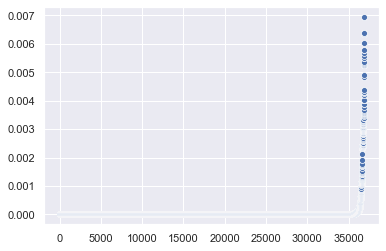

In [28]:
def get_sorted_list_from_dict(dic):
    dic_f = sorted(dic.items(), key=operator.itemgetter(1))
    ckeys=range(len(dic_f))
    keys=[]
    values=[]
    for i in dic_f:
        keys.append(i[0])
        values.append(i[1])
    return ckeys, keys, values


t1,t2 = nx.hits(g, max_iter=100, tol=1e-08, nstart=None, normalized=True)
bc_ck,bc_k,bc_v=get_sorted_list_from_dict(t1)
sns.scatterplot(bc_ck, bc_v);
print("média: {}".format(mean(bc_v)))
print("Atores mais importantes:")



In [24]:
print(bc_k)

    

['Tainy', 'Anuel AA', 'Ozuna', 'Justin Moore', 'Lady Gaga', 'Bradley Cooper', 'Post Malone', 'DaBaby', 'Yella Beezy', 'Gucci Mane', 'Quavo', 'Taylor Swift', 'NF', 'Brantley Gilbert', 'Lindsay Ell', 'NLE Choppa', 'Chris Brown', 'Gunna', 'Nicky Jam', 'Ant Saunders', 'BTS', 'Lauv', 'Rod Wave', 'Kevin Gates', 'Roddy Ricch', 'Meek Mill', 'Justin Bieber', 'Ink', 'Tones And I', 'The Weeknd', 'Ariana Grande', 'Chance The Rapper', 'YK Osiris', 'Matt Stell', 'Harry Styles', 'Young Thug', 'Lil Baby', 'Summer Walker', 'Luke Combs', 'The Chainsmokers', 'Illenium', 'Lennon Stella', 'Dierks Bentley', 'Internet Money', 'Lil Tecca', 'A Boogie Wit da Hoodie', 'NAV', 'Ellie Goulding', 'Juice WRLD', '24kGoldn', 'The Black Eyed Peas', 'J Balvin', 'Diplo Presents Thomas Wesley', 'Morgan Wallen', 'SHAED', 'Blake Shelton', 'Halsey', '5 Seconds Of Summer', 'MadeinTYO', 'Bad Bunny', 'Travis Scott', 'Niall Horan', 'Mariah Carey', 'Shawn Mendes', 'Camila Cabello', 'Moneybagg Yo', 'Drake', 'Bryce Vine', 'YG', 'Sam

In [ ]:
print(t1)

***Seção de Teste de Hipótese***